In [1]:
%pip install pandas numpy yfinance

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 1.7 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.7 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.5 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.4 MB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 1.5 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.5 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 1.5

In [5]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.3 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.3 MB 1.8 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.3 MB 1.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.3 MB 1.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.3 MB 1.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.3 MB 1.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.3 MB 1.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.3 MB 1.6 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/8.3 MB 470.2 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.3 MB 470.2 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.3 MB 470.2 kB/s eta 0:00:16
   ----- ---------------------------------- 1.0/8.3 MB 470.2 kB/s eta 0:00:16
   ----- ---------

In [10]:
%pip install python-bcb

   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.1 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.1 MB 2.0 MB/s eta 0:00:02
   ---------- ----------------------------- 1.0/4.1 MB 2.0 MB/s eta 0:00:02
   --------------- ------------------------ 1.6/4.1 MB 2.0 MB/s eta 0:00:02
   -------------------- ------------------- 2.1/4.1 MB 2.0 MB/s eta 0:00:01
   ----------------------- ---------------- 2.4/4.1 MB 2.0 MB/s eta 0:00:01
   ---------------------------- ----------- 2.9/4.1 MB 2.0 MB/s eta 0:00:01
   ------------------------------ --------- 3.1/4.1 MB 2.0 MB/s eta 0:00:01
   ----------------------------------- ---- 3.7/4.1 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 4.1/4.1 MB 2.0 MB/s  0:00:02

   ---------------------------------------- 0/6 [lxml]
   ---------------------------------------- 0/6 [lxml]
   ---------------------------------------- 0/6 [lxml]
   ------------

In [15]:
    %pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\vinic\AppData\Local\Temp\ipykernel_21416\3936628472.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download('^BVSP', start='2001-12-01', progress=False)['Close']


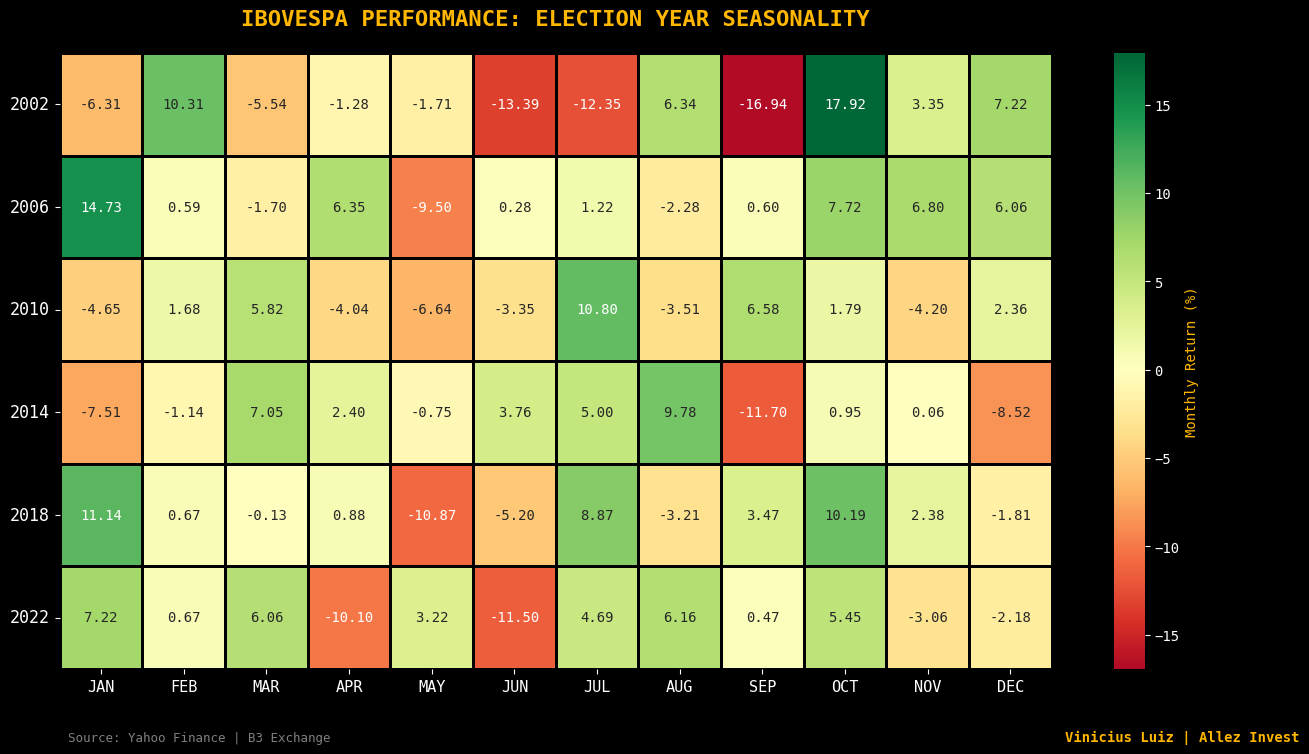

In [18]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. CONFIGURAÇÃO VISUAL "BLOOMBERG THEME" ---
plt.style.use('dark_background')
params = {
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'text.color': '#ffb700',        # Laranja Bloomberg
    'axes.labelcolor': '#ffb700',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'grid.color': '#333333',
    'font.family': 'monospace'
}
plt.rcParams.update(params)

# --- 2. DADOS ---
anos_eleitorais = [2002, 2006, 2010, 2014, 2018, 2022]

# TRADUÇÃO: Meses em Inglês e Caixa Alta
meses_nomes = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 
               'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

print("Downloading Market Data...") # Log em Inglês
dados = yf.download('^BVSP', start='2001-12-01', progress=False)['Close']

# Trava de segurança para dados escalares
if isinstance(dados, pd.DataFrame):
    dados = dados.iloc[:, 0]

# Cálculo
dados_mensais = dados.resample('ME').last().pct_change() * 100

# Preparação da Tabela
df_heatmap = pd.DataFrame({'Retorno': dados_mensais})
df_heatmap['Ano'] = df_heatmap.index.year
df_heatmap['Mes'] = df_heatmap.index.month

# Filtro
df_eleicoes = df_heatmap[df_heatmap['Ano'].isin(anos_eleitorais)]

# Matriz
matriz = df_eleicoes.pivot(index='Ano', columns='Mes', values='Retorno')
matriz.columns = meses_nomes

# --- 3. PLOTAGEM INTERNACIONAL ---
plt.figure(figsize=(16, 8))

# Heatmap
ax = sns.heatmap(matriz, annot=True, fmt=".2f", cmap='RdYlGn', center=0,
                 linewidths=1, linecolor='black', 
                 # TRADUÇÃO: Legenda da barra de cores
                 cbar_kws={'label': 'Monthly Return (%)'})

# TRADUÇÃO: Títulos e Labels
ax.set_title('IBOVESPA PERFORMANCE: ELECTION YEAR SEASONALITY', 
             fontsize=16, fontweight='bold', pad=20, color='#ffb700')

plt.xlabel('') 
plt.ylabel('') 
plt.yticks(rotation=0, fontsize=12)
plt.xticks(fontsize=11)

# --- 4. ASSINATURA ---
# Mantivemos sua marca, mas traduzimos a fonte
plt.figtext(0.13, 0.02, 'Source: Yahoo Finance | B3 Exchange', color='gray', fontsize=9)
plt.figtext(0.90, 0.02, 'Vinicius Luiz | Allez Invest', color='#ffb700', fontsize=10, ha='right', fontweight='bold')

plt.show()

In [19]:
%pip install plotly nbformat

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 1.6 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.9 MB 1.6 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.9 MB 1.6 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.9 MB 1.5 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.9 MB 1.4 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.9 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.6/9.9 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.6/9.9 MB 1.6 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.9 MB 1.5 MB/s eta 0:00:05
   ------------- -------------------------- 3.4/9.9 MB 1.5 MB/s eta 0:00:05
   -------------- ------------------------- 3.7/9.9 MB 1.5 MB/s eta 0:00:05
   --------------- -------

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import textwrap

# --- 1. CONFIGURAÇÕES VISUAIS ---
plt.style.use('dark_background')

COLOR_BG = '#000000'
COLOR_TEXT = '#ffffff'
COLOR_ACCENT = '#ffb700'   # Laranja Bloomberg
COLOR_STRAT = '#00ff00'    # Verde Neon
COLOR_BENCH = '#808080'    # Cinza

plt.rcParams.update({
    'axes.facecolor': COLOR_BG, 'figure.facecolor': COLOR_BG,
    'text.color': COLOR_TEXT, 'axes.labelcolor': COLOR_TEXT,
    'xtick.color': COLOR_TEXT, 'ytick.color': COLOR_TEXT,
    'grid.color': '#333333', 'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'axes.titleweight': 'bold',
})

def add_signature(fig):
    # Assinatura padrão para páginas internas
    fig.text(0.95, 0.02, 'Vinicius Luiz | Allez Invest', color=COLOR_ACCENT, ha='right', fontsize=10, weight='bold')
    fig.text(0.05, 0.02, 'Source: B3 Exchange | Central Bank of Brazil | Yahoo Finance', color='gray', ha='left', fontsize=8)

# --- 2. DADOS ---
selic_rates = {2002: 19.0, 2006: 15.0, 2010: 9.8, 2014: 10.8, 2018: 6.5, 2022: 12.4}
anos_analise = [2002, 2006, 2010, 2014, 2018, 2022]
months_long = [1, 2, 3, 4, 9, 10, 11, 12] 

print("Baixando dados...")
try:
    dados_full = yf.download('^BVSP', start='2000-01-01', progress=False)['Close']
    if isinstance(dados_full, pd.DataFrame): dados_full = dados_full.iloc[:, 0]
except:
    dados_full = pd.Series(dtype='float64')

# --- 3. CONSTRUÇÃO DAS PÁGINAS ---

def create_cover_page():
    fig = plt.figure(figsize=(11.69, 8.27))
    
    # 1. TÍTULO E SUBTÍTULO
    plt.text(0.05, 0.90, "POLITICAL VOLATILITY IS AN ASSET CLASS", fontsize=24, weight='bold', color=COLOR_ACCENT)
    plt.text(0.05, 0.85, "THE 'SMART SEASONAL' STRATEGY FOR BRAZIL", fontsize=14, color='white')

    wrap_width = 60

    # 2. EXECUTIVE SUMMARY
    plt.text(0.05, 0.70, "EXECUTIVE SUMMARY", fontsize=14, weight='bold', color=COLOR_ACCENT)
    
    text_intro = """Everyone talks about political risk. Few measure it. I built a Python algorithm to analyze the last 6 Brazilian election cycles. The data reveals a clear 'Risk-Off' window between May and August where Cash (Selic) consistently beats Equities. Check out the full breakdown below."""
    text_intro_wrapped = textwrap.fill(text_intro, width=wrap_width)
    plt.text(0.05, 0.67, text_intro_wrapped, fontsize=12, va='top', linespacing=1.6, family='monospace')

    # 3. STRATEGY BREAKDOWN
    plt.text(0.05, 0.45, "STRATEGY BREAKDOWN", fontsize=14, weight='bold', color=COLOR_ACCENT)
    
    text_strat = """Historical data shows that the mid-year campaign window (May-Aug) delivers negative returns due to uncertainty. We implement a quantitative rotation:

1. RISK-ON (Jan-Apr & Sep-Dec): Long exposure to Ibovespa to capture liquidity inflows and rallies.

2. RISK-OFF (May-Aug): Tactical rotation to 100% Risk-Free Rate (Selic/CDI). Defensive positioning to avoid "Campaign Corrections"."""
    
    # Processamento manual para manter a lista formatada
    lines = text_strat.split('\n')
    wrapped_lines = [textwrap.fill(line, width=wrap_width) for line in lines]
    final_strat_text = "\n".join(wrapped_lines)

    plt.text(0.05, 0.42, final_strat_text, fontsize=12, va='top', linespacing=1.6, family='monospace')

    # REMOVIDO O DISCLAIMER PARA LIMPAR O RODAPÉ
    
    plt.axis('off')
    
    # Assinatura Capa (Apenas Nome, alinhado à direita)
    fig.text(0.95, 0.02, 'Vinicius Luiz | Allez Invest', color=COLOR_ACCENT, ha='right', fontsize=10, weight='bold')
    
    return fig

def create_heatmap_page():
    dados_mensais = dados_full.resample('ME').last().pct_change() * 100
    df_heat = pd.DataFrame({'Ret': dados_mensais})
    df_heat['Year'] = df_heat.index.year
    df_heat['Month'] = df_heat.index.month
    df_heat = df_heat[df_heat['Year'].isin(anos_analise)]
    matriz = df_heat.pivot(index='Year', columns='Month', values='Ret')
    matriz.columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

    fig, ax = plt.subplots(figsize=(11.69, 8.27))
    sns.heatmap(matriz, annot=True, fmt=".2f", cmap='RdYlGn', center=0, ax=ax,
                linewidths=1, linecolor='black', cbar_kws={'label': 'Monthly Return (%)'})
    
    ax.set_title('IBOV PERFORMANCE: ELECTION CYCLES SEASONALITY', fontsize=22, color=COLOR_ACCENT, pad=20, weight='bold')
    ax.set_ylabel('')
    add_signature(fig)
    return fig

def create_year_page(ano):
    df = pd.DataFrame(dados_full[dados_full.index.year == ano].copy())
    if len(df) == 0: return None
    df.columns = ['Price']
    
    df['Ret_Ibov'] = df['Price'].pct_change().fillna(0)
    selic_day = (1 + selic_rates[ano]/100)**(1/252) - 1
    df['Sinal'] = df.index.month.isin(months_long)
    df['Ret_Strat'] = df.apply(lambda row: row['Ret_Ibov'] if row['Sinal'] else selic_day, axis=1)
    df['Eq_BH'] = 100 * (1 + df['Ret_Ibov']).cumprod()
    df['Eq_ST'] = 100 * (1 + df['Ret_Strat']).cumprod()

    fig, ax = plt.subplots(figsize=(11.69, 8.27))
    
    ax.plot(df.index, df['Eq_BH'], label='IBOVESPA (BENCHMARK)', color=COLOR_BENCH, linestyle='--', linewidth=1.5)
    ax.plot(df.index, df['Eq_ST'], label='SMART STRATEGY', color=COLOR_STRAT, linewidth=3)
    ax.axhline(100, color='white', linestyle=':', alpha=0.5)
    ax.fill_between(df.index, df['Eq_BH'], df['Eq_ST'], where=(df['Eq_ST'] > df['Eq_BH']), color=COLOR_STRAT, alpha=0.1)

    # Títulos
    ax.text(0.0, 1.03, f"ELECTION YEAR: {ano}", transform=ax.transAxes, fontsize=20, weight='bold', color='white', ha='left')
    ax.text(1.0, 1.03, f"RISK FREE RATE (SELIC): {selic_rates[ano]}%", transform=ax.transAxes, fontsize=14, weight='bold', color=COLOR_ACCENT, ha='right')
    
    plt.subplots_adjust(top=0.90)
    ax.set_ylabel("PERFORMANCE (BASE 100)", fontsize=12)
    ax.grid(True, linestyle='-', alpha=0.2)
    ax.legend(loc='upper left', frameon=False)
    
    ret_st = df['Eq_ST'].iloc[-1] - 100
    ret_bh = df['Eq_BH'].iloc[-1] - 100
    alpha = ret_st - ret_bh
    stats_text = f"RESULTS ({ano})\nStrategy: {ret_st:+.1f}%\nIbovespa: {ret_bh:+.1f}%\nAlpha:    {alpha:+.1f}%"
    ax.text(0.02, 0.05, stats_text, transform=ax.transAxes, 
            bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.5'),
            family='monospace', fontsize=11)

    add_signature(fig)
    return fig

# --- EXPORTAÇÃO ---
filename = "Allez_Invest_Book_Official.pdf"
print(f"Gerando PDF Final: {filename}...")

if len(dados_full) > 0:
    with PdfPages(filename) as pdf:
        pdf.savefig(create_cover_page())
        plt.close()
        pdf.savefig(create_heatmap_page())
        plt.close()
        for ano in anos_analise:
            fig = create_year_page(ano)
            if fig: pdf.savefig(fig); plt.close()
    print("Sucesso! PDF gerado sem o disclaimer.")
else:
    print("Erro: Sem dados.")

Baixando dados...


C:\Users\vinic\AppData\Local\Temp\ipykernel_14320\2340087100.py:38: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados_full = yf.download('^BVSP', start='2000-01-01', progress=False)['Close']


Gerando PDF Final: Allez_Invest_Book_Official.pdf...
Sucesso! PDF gerado sem o disclaimer.
